In [6]:
import numpy as np
import matplotlib.pyplot as plt

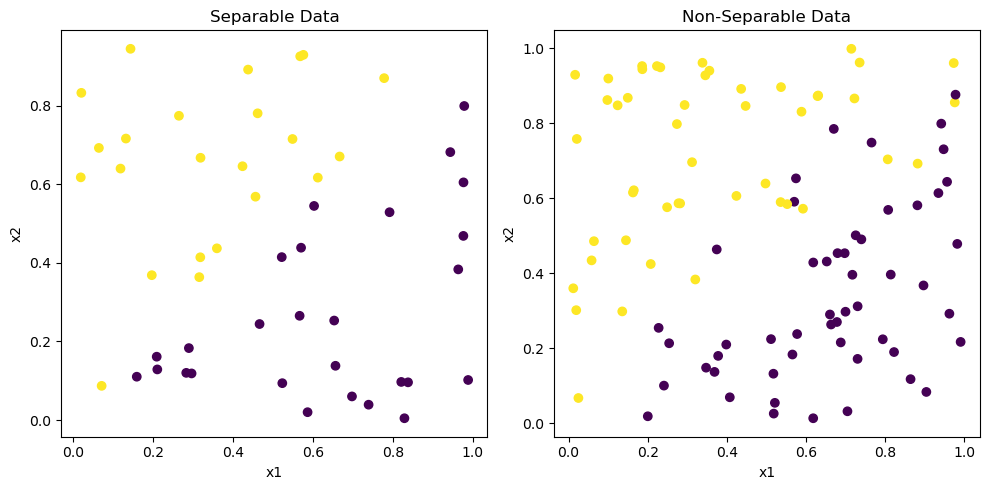

In [7]:
# 3. Classification with Logistic Function

## 3.1 Data Generation (Same as Question 2)
np.random.seed(0)
X_separable = np.random.rand(50, 2)
y_separable = np.array([1 if x[1] > x[0] else 0 for x in X_separable])

X_nonseparable = np.random.rand(100, 2)
y_nonseparable = np.array([1 if x[1] > x[0] + np.random.uniform(-0.2, 0.2) else 0 for x in X_nonseparable])

# Plot generated data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_separable[:, 0], X_separable[:, 1], c=y_separable, cmap='viridis')
plt.title("Separable Data")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(1, 2, 2)
plt.scatter(X_nonseparable[:, 0], X_nonseparable[:, 1], c=y_nonseparable, cmap='viridis')
plt.title("Non-Separable Data")
plt.xlabel("x1")
plt.ylabel("x2")

plt.tight_layout()
plt.show()

In [8]:
## 3.2 Logistic Regression (function definition - same as before)
# ... (include the sigmoid and logistic_regression functions from the previous )

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression(X, y, learning_rate, n_iterations):
    X = np.insert(X, 0, 1, axis=1) #add the bias term
    w = np.zeros(X.shape[1])
    costs = []


    for _ in range(n_iterations):
        y_hat = sigmoid(np.dot(X, w))

        cost = -np.mean(y * np.log(y_hat) + (1-y)*np.log(1- y_hat))  #Use the correct cost(error) function
        costs.append(cost)


        # Weight update rule (Equation 18.8)
        w = w + learning_rate*np.dot(X.T, (y-y_hat)*y_hat*(1-y_hat))/len(X)

    return w, costs


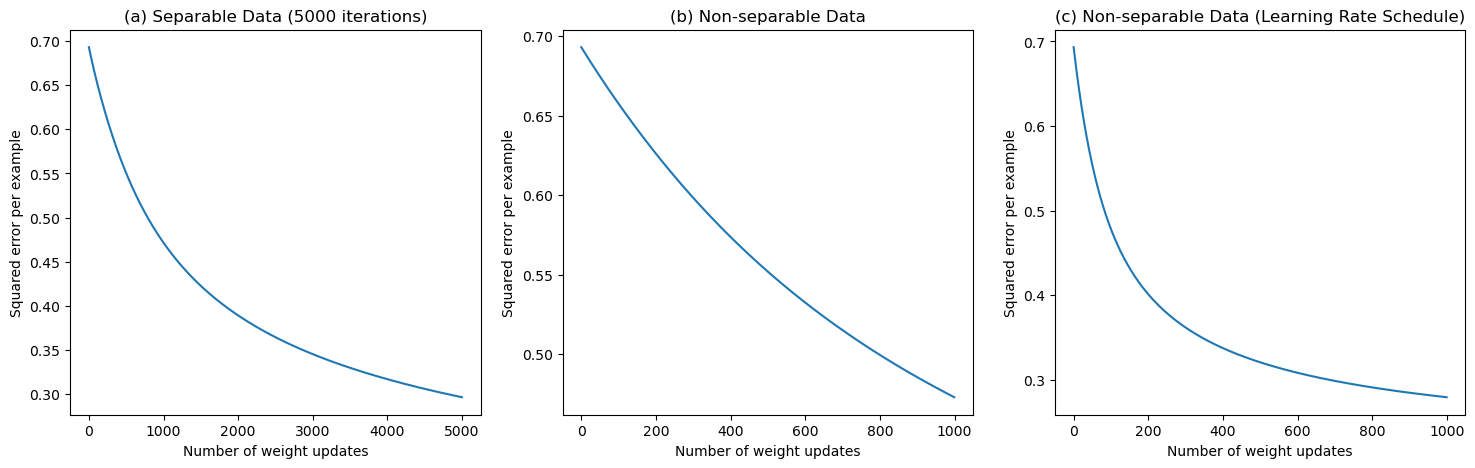

In [9]:
## 3.3 Training and Visualization (Fig. 18.18)

learning_rate = 0.1
n_iterations = 5000  # More iterations for (a) as per Fig. 18.18


# (a) Separable Data

w_separable_logistic , costs_separable_logistic = logistic_regression(X_separable, y_separable, learning_rate, n_iterations)

# (b) Non-separable Data (same iterations as perceptron)

n_iterations = 1000  # Back to 1000 iterations for (b) and (c)
w_nonseparable_logistic, costs_nonseparable_logistic = logistic_regression(X_nonseparable, y_nonseparable, learning_rate, n_iterations)


# (c) Non-separable Data with Learning Rate Schedule

def logistic_regression_schedule(X, y, initial_learning_rate, n_iterations):

    X = np.insert(X, 0, 1, axis=1) #add the bias term
    w = np.zeros(X.shape[1])
    costs = []

    for t in range(n_iterations):

        y_hat = sigmoid(np.dot(X, w))
        cost = -np.mean(y * np.log(y_hat) + (1-y)*np.log(1- y_hat))
        costs.append(cost)
        learning_rate = initial_learning_rate / (initial_learning_rate + t)


        w = w + learning_rate*np.dot(X.T, (y-y_hat)*y_hat*(1-y_hat))/len(X)

    return w, costs


initial_learning_rate = 1000

w_schedule_logistic, costs_schedule_logistic = logistic_regression_schedule(X_nonseparable, y_nonseparable, initial_learning_rate, n_iterations)



# Plotting Fig 18.18

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(costs_separable_logistic)
plt.xlabel('Number of weight updates')
plt.ylabel('Squared error per example')
plt.title('(a) Separable Data (5000 iterations)')


plt.subplot(1, 3, 2)
plt.plot(costs_nonseparable_logistic)
plt.xlabel('Number of weight updates')
plt.ylabel('Squared error per example')
plt.title('(b) Non-separable Data')


plt.subplot(1, 3, 3)
plt.plot(costs_schedule_logistic)
plt.xlabel('Number of weight updates')
plt.ylabel('Squared error per example')
plt.title('(c) Non-separable Data (Learning Rate Schedule)')



plt.show()


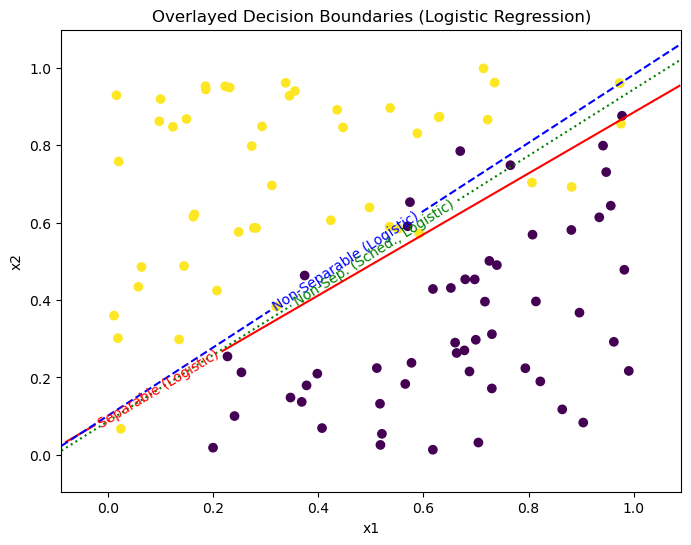

In [10]:
## 3.4 Decision Boundary Visualization (Overlay Method - adapted from Q2, complete code)

def plot_overlayed_decision_boundaries_logistic(X_separable, y_separable, w_separable_logistic, X_nonseparable, y_nonseparable, w_nonseparable_logistic, w_schedule_logistic):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    datasets = [(X_separable, w_separable_logistic, 'red', 'solid', "Separable (Logistic)"),
                (X_nonseparable, w_nonseparable_logistic, 'blue', 'dashed', "Non-Separable (Logistic)"),
                (X_nonseparable, w_schedule_logistic, 'green', 'dotted', "Non-Sep. (Sched., Logistic)")]


    ax.scatter(X_nonseparable[:, 0], X_nonseparable[:, 1], c=y_nonseparable, cmap='viridis') # Plot data points

    for X, w, color, linestyle, label in datasets:
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        X_grid = np.c_[xx.ravel(), yy.ravel()]
        X_grid_with_bias = np.insert(X_grid, 0, 1, axis=1)  # Add bias term

        # Use sigmoid for logistic regression
        Z = sigmoid(np.dot(X_grid_with_bias, w))  # Important change for logistic regression


        Z = Z.reshape(xx.shape)
        CS = ax.contour(xx, yy, Z, [0.5], colors=[color], linestyles=[linestyle]) #0.5 is the decision boundary
        ax.clabel(CS, inline=1, fontsize=10, fmt={0.5: label}) 

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Overlayed Decision Boundaries (Logistic Regression)')
    plt.show()



# Call the plotting function after training:
plot_overlayed_decision_boundaries_logistic(X_separable, y_separable, w_separable_logistic, X_nonseparable, y_nonseparable, w_nonseparable_logistic, w_schedule_logistic)